In [1]:
# 변수 축소
# 주성분분석 : 변수 10개 -> 10개의 주성분 -> 주성분 2개만 사용해도 95% 분산을 설명
# 주성분분석 전 표준화 혹은 정규화 진행 : 스케일 차이가 큰 변수가 주성분에 영향
# 주성분의 설명력 확인가능
# > StandardScaler(), sklearn.PCA.explained_variance_ratio를 통해서 또는 Scree plot을 통해서
# PCA함수는 공분산행렬의 고유벡터를 구하는 방법을 사용한다. + 선형대수
# 왜 PCA함수를 사용하는지, 왜 차원을 줄이는지 설명 필요

In [2]:
# 차원의 저주 
# 차원을 이동시키면 어떤 축은 설명력이 적어진다. 
# 축을 이동시켜, 설명력을 최대로하는 축을 찾는다.
# 요인회전 : x-y-z -> y,z -> x,y,z가 고유벡터 값을 보유
# 모든 데이터를 분산이 적도록 특정 축으로 이동 
# -> 분산을 설명할 수 있는 공간이 줄어들고
# -> 분산을 얼마나 잘 설명할 수 있는지 파악가능 

# 결국 차원이 커짐으로써 빈 공간이 늘어나며, 분산을 설명하기 어려우며,
# 공간을 줄이는 것이 차원 축소의 이유
# 1/10 -> 5/100 -> 5/1000

# 데이터 용량이 커질수록 불필요한 샘플 증가 현상이 일어남
# 과도한 정보를 훈련시키면 부정확하고 잘못된 모델이 탄생할 가능성이 증가함.
# -> 차원 축소로 해결

In [3]:
import pandas as pd

In [4]:
iris = pd.read_csv('data/iris.csv')

In [7]:
# 수치형 데이터만 추출
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = iris.loc[:, features].values

In [9]:
# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
# Scree Plot으로 주성분 개수를 정하는 방법
pca = PCA(n_components = 4) # 처음에는 features 개수만큼
pca_fit = pca.fit(x)

In [14]:
pca_fit.explained_variance_ratio_ # 분산설명력 비율

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [15]:
print("고유값 : ", pca.singular_values_) # 벡터(축)
print("분산설명력 : ", pca.explained_variance_ratio_)

# 아래 PCA1이 72% 설명력
# PCA1 + PCA2 95% 설명력 -> 4차원을 2차원으로
# 각 차원에는 4개의 변수들이 들어가 있다.  

고유값 :  [20.89551896 11.75513248  4.7013819   1.75816839]
분산설명력 :  [0.72770452 0.23030523 0.03683832 0.00515193]


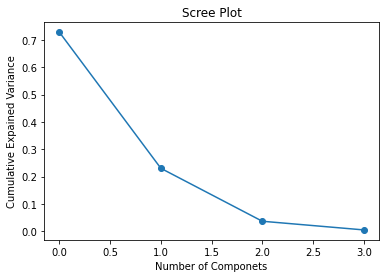

In [16]:
# Scree Plot
import matplotlib.pyplot as pit
pit.title('Scree Plot')
pit.xlabel('Number of Componets')
pit.ylabel('Cumulative Expained Variance')
pit.plot(pca.explained_variance_ratio_, 'o-')

In [19]:
pca = PCA(n_components = 2 ) # PCA 객체 생성(주성분 개수 2개 생성)
principalComponents = pca.fit_transform(x) ## 주성분 2개 객체에 할당
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component1', 'principal component2'])
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [20]:
principalDf
# PCA 단점 : PCA1이 4개의 변수를 얼마만큼 가지고 있는지 파악하기 어려움

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


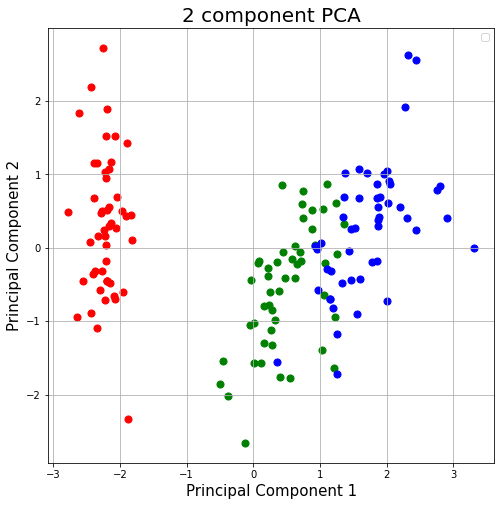

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1']
               , principalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend()
ax.grid()